# <center> Сегментация клиентов онлайн магазина подарков

## Постановка задачи


<center> <img src=https://salesupnow.ru/storage/app/media/pipeople.png align="right" width="300"/> </center>

Маркетинг — неотъемлемая часть любого бизнеса. Для повышения прибыли компании важно понимать своего клиента, его пожелания и предпочтения. С появлением электронной коммерции, или онлайн-продаж, стало намного проще собирать данные о клиентах, анализировать их, находить закономерности и реализовывать маркетинговые кампании.

Большинство интернет-магазинов используют инструменты веб-аналитики, чтобы отслеживать просмотры страниц, количество и поведение посетителей и коэффициент отказов. Но отчёта из Google Analytics или аналогичной системы может быть недостаточно для полного понимания того, как клиенты взаимодействуют с сайтом. Компаниям важно иметь возможность быстро и точно реагировать на перемены в поведении клиентов, создавая инструменты, которые обнаруживают эти изменения практически в режиме реального времени.

Машинное обучение помогает поисковой системе анализировать огромное количество данных о посетителях платформы, узнавать модели поведения профессиональных покупателей, определять категорию клиентов (например, лояльные/перспективные/новички/спящие/ушедшие) и выбирать правильную стратегию взаимодействия с ними.

Стоит также отметить, что компании, использующие машинное обучение на своих платформах электронной коммерции, могут постоянно повышать эффективность бизнес-процессов: настраивать товарную выборку персонально для каждого покупателя и предлагать выгодную цену в соответствии с бюджетом клиента и т. д. Эта задача относится к категории построения рекомендательных систем, речь о которых пойдёт в следующем разделе нашего курса.

> Как правило, наборы данных для электронной коммерции являются частной собственностью и, следовательно, их трудно найти среди общедоступных данных. Однако [The UCI Machine Learning Repository](http://archive.ics.uci.edu/ml/index.php)  создал набор данных, содержащий фактические транзакции за 2010 и 2011 годы. С ним нам как раз и предлагается поработать в этом кейсе. 

> В нашем распоряжении будет набор данных, который содержит все транзакции, произошедшие в период с 01/12/2010 по 09/12/2011 для базирующейся в Великобритании компании, занимающейся онлайн-розничной торговлей. Компания в основном продает уникальные подарки на все случаи жизни. Многие клиенты компании являются оптовиками.


**Бизнес-задача:** произвести сегментацию существующих клиентов, проинтерпретировать эти сегменты и определить стратегию взаимодействия с ними.

**Техническая задача для вас как для специалиста в Data Science:** построить модель кластеризации клиентов на основе их покупательской способности, частоты заказов и срока давности последней покупки, определить профиль каждого из кластеров.

**Основные цели проекта:**
1. Произвести предобработку исходного набора данных о транзакциях.
2. Провести разведывательный анализ данных и выявить основные закономерности.
3. Сформировать набор данных о характеристиках каждого из уникальных клиентов.
4. Построить несколько моделей машинного обучения, решающих задачу кластеризации клиентов, определить количество кластеров и проинтерпретировать их.
5. Спроектировать процесс предсказания категории интересов клиента и протестировать вашу модель на новых клиентах.




## Данные и их описание

Данные представляют собой таблицу в формате CSV, в каждой строке которой содержится информация об уникальной транзакции.

Признаки, описывающие каждую транзакцию:

* InvoiceNo — номер счёта-фактуры (уникальный номинальный шестизначный номер, присваиваемый каждой транзакции; буква "C" в начале кода указывает на отмену транзакции);
* StockCode — код товара (уникальное пятизначное целое число, присваиваемое каждому отдельному товару);
* Description — название товара;
* Quantity — количество каждого товара за транзакцию;
* InvoiceDate — дата и время выставления счёта/проведения транзакции;
* UnitPrice — цена за единицу товара в фунтах стерлингов;
* CustomerID — идентификатор клиента (уникальный пятизначный номер, однозначно присваиваемый каждому клиенту);
* Country — название страны, в которой проживает клиент.



Импорт базовых библиотек:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots

import warnings 

from IPython.display import display, HTML

warnings.filterwarnings("ignore")

plt.rcParams["patch.force_edgecolor"] = True

## 1. Знакомство со структурой данных

Первым делом необходимо понять, с какими данными предстоит работать, и произвести базовую предобработку данных — перевести признаки в необходимые для дальнейшей работы форматы.

Познакомьтесь с исходными данными поближе:

* Проведите статистический анализ исходных данных, посмотрев на основные диапазоны исходных признаков.
* Узнайте, сколько уникальных клиентов совершали транзакции в указанный период.
* Узнайте, из каких стран совершались транзакции.
* Исследуйте данные на наличие пропусков и дубликатов.
* Переведите столбцы в корректные форматы (например, даты в формат datetime).

In [2]:
data = pd.read_csv(
    "./data/data.csv", 
    encoding="ISO-8859-1", 
    dtype={'CustomerID': str,'InvoiceID': str}
)
print('Data shape: {}'.format(data.shape))
data.head(5)

Data shape: (541909, 8)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom


In [3]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
print('Date interval {} to {}'.format(data['InvoiceDate'].dt.date.min(), data['InvoiceDate'].dt.date.max()))

Date interval 2010-12-01 to 2011-12-09


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  object        
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 33.1+ MB


In [5]:
data.describe()

,Quantity,UnitPrice
count,541909.000000,541909.000000
mean,9.552250,4.611114
std,218.081158,96.759853
min,-80995.000000,-11062.060000
25%,1.000000,1.250000
50%,3.000000,2.080000
75%,10.000000,4.130000
max,80995.000000,38970.000000


In [6]:
print(f"Число уникальных клиентов: {data['CustomerID'].nunique()} \n")
print(f"Страны, из которых совершались покупки: \n {data['Country'].unique()} \n")
display(data.groupby('Country')['CustomerID'].count().sort_values(ascending=False))

Число уникальных клиентов: 4372 

Страны, из которых совершались покупки: 
 ['United Kingdom' 'France' 'Australia' 'Netherlands' 'Germany' 'Norway'
 'EIRE' 'Switzerland' 'Spain' 'Poland' 'Portugal' 'Italy' 'Belgium'
 'Lithuania' 'Japan' 'Iceland' 'Channel Islands' 'Denmark' 'Cyprus'
 'Sweden' 'Austria' 'Israel' 'Finland' 'Bahrain' 'Greece' 'Hong Kong'
 'Singapore' 'Lebanon' 'United Arab Emirates' 'Saudi Arabia'
 'Czech Republic' 'Canada' 'Unspecified' 'Brazil' 'USA'
 'European Community' 'Malta' 'RSA'] 



Country
United Kingdom          361878
Germany                   9495
France                    8491
EIRE                      7485
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               1877
Portugal                  1480
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
USA                        291
Israel                     250
Unspecified                244
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon                     45


In [7]:
print(f'Число дубликатов: {data[data.duplicated()].shape[0]}')

Число дубликатов: 5268


## 2. Преобразование, очистка и анализ данных

### 2.1. Преобразование и очистка данных о транзакциях

#### 2.1.1 Пропуски

Пропуски в столбце с идентификатором клиента (CustomerID) и описанием товара свидетельствуют о некорректных/незавершённых транзакциях. Удалите их из данных.

**Примечание.** Если посмотреть на распределение пропусков в столбцах Description и CustomerID, то можно заметить, что достаточно удалить строки, содержащие пропуски в столбце CustomerID, тогда пропуски в столбце Description удаляются автоматически.


In [8]:
data=data.dropna(subset='CustomerID')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  object        
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 27.9+ MB


#### 2.1.2. Дубликаты

Проверьте данные на наличие дубликатов. Удалите их из данных.


In [9]:
data=data.drop_duplicates()

#### 2.1.3. Транзакции с отрицательным количеством товара

Из приведённых выше инсайтов о данных мы узнали все особенности отмены заказов. Когда мы будем сегментировать клиентов, мы будем определять их покупательскую способность. При расчёте покупательской способности нам будет очень важно учесть возвраты этого клиента.

Чтобы подсчитать количество возвратов, для начала нам надо определить, сколько уникальных товаров указано в транзакции (корзине) для каждой уникальной пары «клиент — заказ»:


In [10]:
temp = data.groupby(by=['CustomerID', 'InvoiceNo'], as_index=False)['InvoiceDate'].count()
nb_products_per_basket = temp.rename(columns = {'InvoiceDate':'Number of products'})
nb_products_per_basket.head()

,CustomerID,InvoiceNo,Number of products
0,12346,541431,1
1,12346,C541433,1
2,12347,537626,31
3,12347,542237,29
4,12347,549222,24


**Примечание.** Более 16 % уникальных заказов являются возвратами. Интересный факт: если мы подсчитали количество транзакций, содержащих признак возврата, в изначальной таблице, где на каждый уникальный товар заведена отдельная строка, то мы получили бы, что количество возвратов менее 1 %. Однако это число было бы некорректным.

Создайте в ваших данных о транзакциях признак `QuantityCanceled`. Этот признак будет указывать на количество отменённого впоследствии товара для каждой транзакции, на которую найдётся противоположная ей транзакция с возвратом. Для транзакций, для которых не было возвратов, признак будет равен 0. Для транзакций, для которых указано отрицательное количество товара, но в данных отсутствует контрагент, признак будет пустым.

В качестве вспомогательного инструмента мы подготовили для вас функцию `get_quantity_canceled()`. Эта функция принимает на вход таблицу с транзакциями и возвращает объект `Series` — столбец, в котором указано количество отменённого впоследствии товара для каждой транзакции. Если транзакция не имеет контрагента, этот признак помечается как `NaN`.

Отметим, что эта функция не учитывает сложный случай, когда количество отменённого товара в транзакции-возврате больше, чем количество товара, которое указано в любой из отдельных транзакций на покупку (это случай, когда клиент сделал несколько заказов одного и того же товара, а потом оформил возврат на все товары разом). При желании вы можете самостоятельно модифицировать функцию для предобработки, чтобы учесть этот пограничный случай.

*Осторожно! Поиск отменённых транзакций занимает много времени из-за большого количества строк в таблице. Выполнение следующего кода может занять до 20 минут в зависимости от мощности компьютера.*

In [31]:
data[data['StockCode']=='85036C']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,QuantityCanceled,TotalPrice,quarter,date,hour,true_quantity
9845,537219,85036C,ROSE 1 WICK MORRIS BOXED CANDLE,1,2010-12-05 15:47:00,4.25,14081,United Kingdom,0.0,4.25,4,2010-12-05,15,1.0
13204,537422,85036C,ROSE 1 WICK MORRIS BOXED CANDLE,1,2010-12-06 15:27:00,4.25,17812,United Kingdom,0.0,4.25,4,2010-12-06,15,1.0
18069,537794,85036C,ROSE 1 WICK MORRIS BOXED CANDLE,1,2010-12-08 13:01:00,4.25,16713,United Kingdom,0.0,4.25,4,2010-12-08,13,1.0
28647,538652,85036C,ROSE 1 WICK MORRIS BOXED CANDLE,1,2010-12-13 15:12:00,4.25,17890,United Kingdom,0.0,4.25,4,2010-12-13,15,1.0
29522,538801,85036C,ROSE 1 WICK MORRIS BOXED CANDLE,12,2010-12-14 11:51:00,1.85,16083,United Kingdom,0.0,22.20,4,2010-12-14,11,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
477830,577077,85036C,ROSE 1 WICK MORRIS BOXED CANDLE,1,2011-11-17 15:16:00,1.25,17799,United Kingdom,0.0,1.25,4,2011-11-17,15,1.0
480227,577296,85036C,ROSE 1 WICK MORRIS BOXED CANDLE,1,2011-11-18 12:47:00,1.25,17286,United Kingdom,0.0,1.25,4,2011-11-18,12,1.0
485997,577696,85036C,ROSE 1 WICK MORRIS BOXED CANDLE,1,2011-11-21 11:57:00,1.25,16406,United Kingdom,0.0,1.25,4,2011-11-21,11,1.0
493153,578155,85036C,ROSE 1 WICK MORRIS BOXED CANDLE,1,2011-11-23 11:32:00,1.25,12748,United Kingdom,0.0,1.25,4,2011-11-23,11,1.0


In [27]:
data[data['Quantity']<data['QuantityCanceled']]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,QuantityCanceled,TotalPrice,quarter,date,hour,true_quantity
99,536378,84991,60 TEATIME FAIRY CAKE CASES,24,2010-12-01 09:37:00,0.55,14688,United Kingdom,27.0,-1.65,4,2010-12-01,9,-3.0
4759,536800,84378,SET OF 3 HEART COOKIE CUTTERS,12,2010-12-02 16:12:00,1.25,14829,United Kingdom,24.0,-15.00,4,2010-12-02,16,-12.0
5246,536851,21428,SET3 BOOK BOX GREEN GINGHAM FLOWER,8,2010-12-03 09:49:00,4.25,12967,United Kingdom,25.0,-72.25,4,2010-12-03,9,-17.0
7604,537047,22736,RIBBON REEL MAKING SNOWMEN,2,2010-12-05 11:02:00,1.65,13069,United Kingdom,3.0,-1.65,4,2010-12-05,11,-1.0
24097,538313,22586,FELTCRAFT HAIRBAND PINK AND BLUE,1,2010-12-10 13:50:00,0.85,15514,United Kingdom,47.0,-39.10,4,2010-12-10,13,-46.0
25468,538370,22910,PAPER CHAIN KIT VINTAGE CHRISTMAS,8,2010-12-12 11:06:00,2.95,16923,United Kingdom,18.0,-29.50,4,2010-12-12,11,-10.0
25471,538370,22960,JAM MAKING SET WITH JARS,3,2010-12-12 11:06:00,4.25,16923,United Kingdom,4.0,-4.25,4,2010-12-12,11,-1.0
25483,538370,22144,CHRISTMAS CRAFT LITTLE FRIENDS,14,2010-12-12 11:06:00,2.10,16923,United Kingdom,30.0,-33.60,4,2010-12-12,11,-16.0
25484,538370,22142,CHRISTMAS CRAFT WHITE FAIRY,2,2010-12-12 11:06:00,1.45,16923,United Kingdom,10.0,-11.60,4,2010-12-12,11,-8.0
25494,538370,22149,FELTCRAFT 6 FLOWER FRIENDS,5,2010-12-12 11:06:00,2.10,16923,United Kingdom,10.0,-10.50,4,2010-12-12,11,-5.0


In [11]:
def get_quantity_canceled(data):
    """Функция для создания признака количества отменённых заказов. 
    Функция принимает на вход таблицу и возвращает столбец, в котором указано количество отменённого впоследствии товара для кажой транзакции.
    Если транзакция с отрицательным количеством товара не имеет контрагента, данный признак помечается как NaN.

    Args:
        data (DataFrame): таблица с транзакциями

    Returns:
        Series: столбец с количеством отменённого товара
    """
    # Инициализируем нулями Series той же длины, что и столбцы таблицы.
    quantity_canceled = pd.Series(np.zeros(data.shape[0]), index=data.index)    
    negative_quantity = data[(data['Quantity'] < 0)].copy()
    for index, col in negative_quantity.iterrows():
        # Создаём DataFrame из всех контрагентов
        df_test = data[(data['CustomerID'] == col['CustomerID']) &
                       (data['StockCode']  == col['StockCode']) & 
                       (data['InvoiceDate'] < col['InvoiceDate']) & 
                       (data['Quantity'] > 0)].copy()
        # Транзация-возврат не имеет контрагента — ничего не делаем
        if (df_test.shape[0] == 0):
            # Помечаем столбец как пропуск
            quantity_canceled.loc[index] = np.nan
        # Транзакция-возврат имеет ровно одного контрагента
        # Добавляем количество отменённого товара в столбец QuantityCanceled
        elif (df_test.shape[0] == 1): 
            index_order = df_test.index[0]
            quantity_canceled.loc[index_order] = -col['Quantity']       
        # Транзакция-возврат имеет несколько контрагентов
        # Задаём количество отменённого товара в столбец QuantityCanceled для той транзакции на покупку,
        # в которой количество товара больше количества товаров в транзакции-возврате.
        elif (df_test.shape[0] > 1): 
            df_test.sort_index(axis=0 ,ascending=False, inplace = True)        
            for ind, val in df_test.iterrows():
                if val['Quantity'] < -col['Quantity']: 
                    continue
                quantity_canceled.loc[ind] = -col['Quantity']
                break    
    return quantity_canceled

data['QuantityCanceled'] = get_quantity_canceled(data)

*Осторожно! Поиск отмененных транзакций занимает достаточно длительное время из-за количества строк в таблице. Выполнение следующего кода может занять до 20 минут в зависимости от компьютера.*

Узнайте, сколько транзакций в данных не имеют контрагентов, и, если их количество невелико, удалите их из данных.

Когда вы разобрались с возвратами, удалите транзакции с отрицательным количеством товара — они нам больше не нужны.



In [12]:
perc=data['QuantityCanceled'].isna().mean()*100
print(f'Процент транзакций без контрагентов: {perc}')
data=data.dropna(subset='QuantityCanceled')
data=data[data['Quantity']>=0]

Процент транзакций без контрагентов: 0.3244489596717164


#### 2.1.4. Специализированные транзакции

Следующая задача — обработать специальные виды транзакций, которые обозначаются латинскими буквами.

В данных присутствует шесть специальных видов транзакций. С помощью регулярных выражений найдите такие коды товаров (StockCode), которые начинаются с латинских букв (при этом коды могут содержать цифры).

**Подсказка.** В качестве шаблона для поиска используйте строку '^[a-zA-Z]+'.

Чтобы понять, что означают эти коды, можно заглянуть в столбец с описанием (Description), например POST означает почтовые расходы, C2 — расходы на транспортировку, BANK CHARGES — банковские расходы.

Специальные операции не характеризуют покупательскую способность клиентов, так как не относятся напрямую к их покупкам, поэтому такие записи нам не нужны. Удалите все специальные транзакции из таблицы.

In [13]:
special_types_mask=~data['StockCode'].str.extract(r'(^[a-zA-Z]+).*').isna().values
data_code=data[special_types_mask][['StockCode', 'Description']]
print([elem for elem in zip(data_code['StockCode'].unique(), data_code['Description'].unique())])
data=data[~special_types_mask]

[('POST', 'POSTAGE'), ('C2', 'CARRIAGE'), ('M', 'Manual'), ('BANK CHARGES', 'Bank Charges'), ('PADS', 'PADS TO MATCH ALL CUSHIONS'), ('DOT', 'DOTCOM POSTAGE')]


#### 2.1.5. Транзакции с товарами без стоимости

При просмотре описательных статистик можно заметить, что на некоторые товары установлена цена в 0 фунтов стерлингов. Таких транзакций оказывается менее 1 % — можно удалить их.

In [14]:
print(f'Процент транзакций с ценой 0 фунтов стерлингов: {(data["UnitPrice"]==0).mean()*100}')
data=data[data['UnitPrice']!=0]

Процент транзакций с ценой 0 фунтов стерлингов: 0.00843594941497969


#### 2.1.6. Общая стоимость товаров в транзакции

Добавьте в ваш датасет общую цену заказа (TotalPrice). Она рассчитывается как:
 
 **общая цена = цена за единицу товара * (количество товаров в заказе - количество возвращённых товаров).**

Этот признак впоследствии поможет вам рассчитать покупательскую способность каждого из клиентов.

In [15]:
data['TotalPrice']=data['UnitPrice']*(data['Quantity']-data['QuantityCanceled'])


Помимо рекомендованных преобразований, вы также можете придумать собственные и применить их к исходным данным.
После завершения предобработки сохраните результат очищения данных в отдельный файл, чтобы впоследствии вам не приходилось повторять эти действия.


### 2.2. Разведывательный анализ

После предобработки исходных данных произведите разведывательный анализ и исследуйте транзакции, ответив на следующие вопросы:

* Клиенты из каких стран покупают больше и чаще?
* Какие страны приносят наибольшую сезонную выручку?
* Присутствует ли в продажах сезонность (когда покупают чаще)?
* Сгруппируйте данные по датам и часам совершения транзакции и найдите количество заказов на каждый день-час. Затем найдите среднее количество ежедневно поступающих заказов в каждый из часов.
* Каково распределение среднего количества ежедневно поступающих заказов по времени суток (часу совершения транзакции)? 

**Примечание.** Вы можете сформулировать и другие вопросы. Главная цель — извлечь максимум понятной информации из исходных данных.

Свои рассуждения сопроводите графиками и диаграммами.



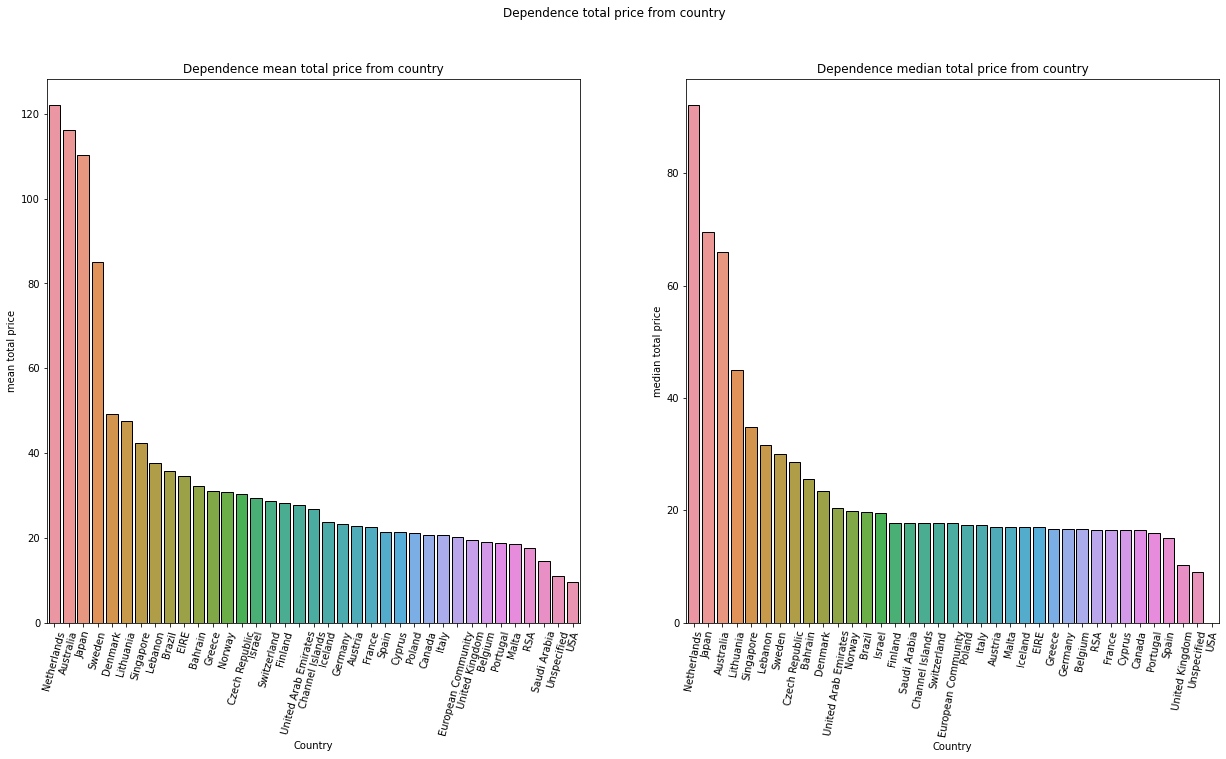

In [16]:
bar_data_mean=data.groupby('Country')['TotalPrice'].mean().sort_values(ascending=False)
bar_data_median=data.groupby('Country')['TotalPrice'].median().sort_values(ascending=False)
plt.figure(figsize=(21, 10))
plt.suptitle('Dependence total price from country')
plt.subplot(1, 2, 1)
sns.barplot(x=bar_data_mean.index, y=bar_data_mean.values).set(title='Dependence mean total price from country')
plt.xticks(rotation=75)
plt.ylabel('mean total price')
plt.subplot(1, 2, 2)
sns.barplot(x=bar_data_median.index, y=bar_data_median.values).set(title='Dependence median total price from country')
plt.xticks(rotation=80)
plt.ylabel('median total price');

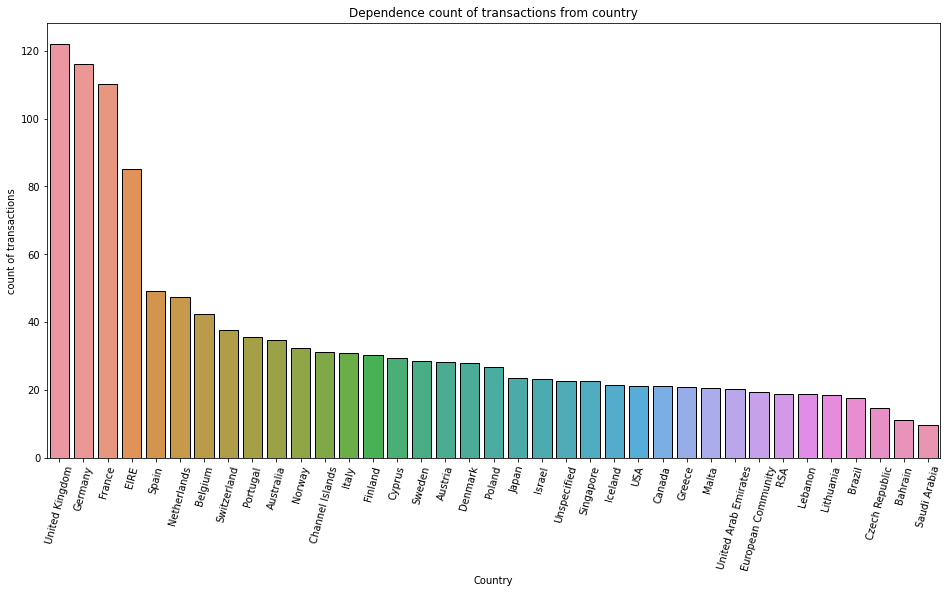

In [17]:
bar_data_count=data.groupby('Country')['StockCode'].count().sort_values(ascending=False)
plt.figure(figsize=(16, 8))
sns.barplot(x=bar_data_count.index, y=bar_data_mean.values).set(title='Dependence count of transactions from country')
plt.xticks(rotation=75)
plt.ylabel('count of transactions');


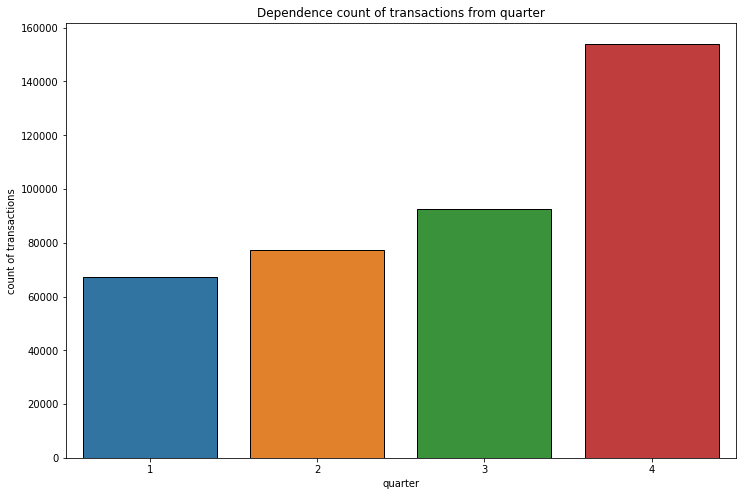

In [18]:
data['quarter']=data['InvoiceDate'].dt.quarter
bar_data_quarter=data.groupby('quarter')['InvoiceNo'].count()
plt.figure(figsize=(12, 8))
sns.barplot(x=bar_data_quarter.index, y=bar_data_quarter.values).set(title='Dependence count of transactions from quarter')
plt.ylabel('count of transactions');

In [19]:
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,QuantityCanceled,TotalPrice,quarter
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,0.0,15.30,4
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0.0,20.34,4
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,0.0,22.00,4
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0.0,20.34,4
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0.0,20.34,4
...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,0.0,10.20,4
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,0.0,12.60,4
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,0.0,16.60,4
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,0.0,16.60,4


In [20]:
data['date'] = data['InvoiceDate'].dt.date
data['hour'] = data['InvoiceDate'].dt.hour
data_date_hour=data.groupby(['date', 'hour'])['InvoiceNo'].count()
display(data_date_hour)
data_date_hour_mean=data_date_hour.groupby('hour').mean()
display(data_date_hour_mean)

date        hour
2010-12-01  8        45
            9       149
            10      114
            11      351
            12      412
                   ... 
2011-12-09  8       112
            9        58
            10      128
            11      131
            12      176
Name: InvoiceNo, Length: 2853, dtype: int64

hour
6       1.000000
7      16.304348
8      42.274510
9      86.456349
10    123.953795
11    158.582237
12    231.855738
13    207.947020
14    176.252492
15    148.222591
16     89.492424
17     70.475410
18     61.361702
19     65.897959
20     55.500000
Name: InvoiceNo, dtype: float64

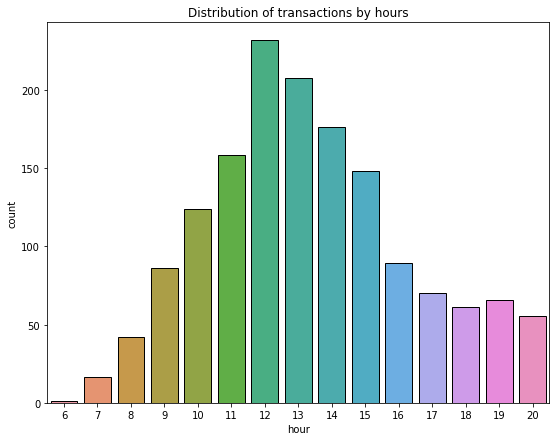

In [21]:
plt.figure(figsize=(9,7))
sns.barplot(x=data_date_hour_mean.index, y=data_date_hour_mean.values).set(title='Distribution of transactions by hours')
plt.ylabel('count');

### 2.3. Построение RFM-таблицы и поиск RFM-выбросов

Мы добрались до самой интересной части нашей задачи. Нам предстоит сформировать признаки, на основе которых мы будем производить сегментацию клиентов.

Для этого давайте познакомимся с очень популярным методом для анализа потребительской ценности под названием RFM. 

<center> <img src=https://miro.medium.com/max/1400/1*uYQjy9SUjW7iWHc2gGanQQ.png align="right" width="400"/> </center>

Метод заключается в группировке клиентов на основе следующих параметров:
* Recency (Давность) — давность последней покупки клиента;
* Frequency (Частота) — общее количество покупок клиента;
* Monetary Value (Денежная ценность) — сколько денег потратил клиент.


Суть RFM-анализа состоит в том, что мы разделяем всех клиентов на группы в зависимости от того, как давно они сделали последнюю покупку, как часто покупали и насколько большой была сумма их заказов. 

Например, вот так может выглядеть интерпретация кластеров для случая RF-сегментации (анализа на основе давности и частоты заказов клиента):

<img src=https://retailrocket.ru/wp-content/uploads/2017/06/rfm-1.png>

Задача маркетологов — вести клиента в зону лояльных.

Мы можем рассчитать RFM-характеристики для каждого из клиентов в нашем датасете и на их основе с помощью методов кластеризации построить подобные сегменты клиентов, привязанные к нашим данным.

Чтобы получить RFM-таблицу, нам необходимо сгруппировать данные по идентификаторам клиента и рассчитать следующие  агрегированные характеристики:

* Recency для i-го клиента рассчитывается как разница между датой и временем последнего заказа и точкой отсчёта, переведённая в дни:
    $$t_0-max(t_{i1}, t_{i2},..., t_{iM})$$

    где $t_{ij}$ — дата и время совершения i-ым клиентом своей j-ой покупки.

    В качестве точки отсчёта $t_0$ берём дату на один день «старше», чем все наши данные. Это будет 10 декабря 2011 года (в формате datetime — '2011-12-10 00:00:00').

* Frequency рассчитывается как общее количество уникальных заказов, которые совершил i-ый клиент.
* Monetary Value рассчитывается как общая сумма денег, которую i-ый клиент потратил на наши товары (с учётом возвратов).

Когда вы рассчитаете все характеристики, не забудьте дать столбцам результирующей таблицы соответствующие названия.

In [22]:
data[data['Quantity']>=data['QuantityCanceled']]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,QuantityCanceled,TotalPrice,quarter,date,hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,0.0,15.30,4,2010-12-01,8
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0.0,20.34,4,2010-12-01,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,0.0,22.00,4,2010-12-01,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0.0,20.34,4,2010-12-01,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0.0,20.34,4,2010-12-01,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,0.0,10.20,4,2011-12-09,12
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,0.0,12.60,4,2011-12-09,12
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,0.0,16.60,4,2011-12-09,12
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,0.0,16.60,4,2011-12-09,12


In [23]:
#frequency[ind.values]=0

In [24]:
#ind=data[data['Quantity']<=data['QuantityCanceled']].CustomerID
#ind.values

## Сравним между собой RFM-модель и RFMQ-модель

In [26]:
recency=(pd.to_datetime('2011-12-10 00:00:00')-data.groupby('CustomerID')['InvoiceDate'].max()).dt.days

frequency=data.groupby('CustomerID')['StockCode'].count()
#????
monetary=data.groupby('CustomerID')['TotalPrice'].sum()

data['true_quantity']=data['Quantity']-data['QuantityCanceled']
quantity=data.groupby('CustomerID')['true_quantity'].mean()

display(recency)
display(frequency)
display(monetary)
display(quantity)

CustomerID
12346    325
12347      2
12348     75
12349     18
12350    310
        ... 
18280    277
18281    180
18282      7
18283      3
18287     42
Name: InvoiceDate, Length: 4334, dtype: int64

CustomerID
12346      1
12347    182
12348     27
12349     72
12350     16
        ... 
18280     10
18281      7
18282     12
18283    719
18287     70
Name: StockCode, Length: 4334, dtype: int64

CustomerID
12346       0.00
12347    4310.00
12348    1437.24
12349    1457.55
12350     294.40
          ...   
18280     180.60
18281      80.82
18282     176.60
18283    2039.58
18287    1837.28
Name: TotalPrice, Length: 4334, dtype: float64

CustomerID
12346     0.000000
12347    13.505495
12348    86.370370
12349     8.750000
12350    12.250000
           ...    
18280     4.500000
18281     7.714286
18282     8.166667
18283     1.884562
18287    22.657143
Name: true_quantity, Length: 4334, dtype: float64

In [ ]:
rfm_table=pd.DataFrame({'recency': recency.values, 'frequency': frequency.values, 'monetary': monetary.values})
rfm_table

,recency,frequency,monetary
0,325,1,0.00
1,2,182,4310.00
2,75,27,1437.24
3,18,72,1457.55
4,310,16,294.40
...,...,...,...
4329,277,10,180.60
4330,180,7,80.82
4331,7,12,176.60
4332,3,719,2039.58


In [ ]:
rfmq_table=pd.DataFrame({'recency': recency.values, 'frequency': frequency.values, 'monetary': monetary.values, 'quantity': quantity.values})
rfmq_table

,recency,frequency,monetary,quantity
0,325,1,0.00,0.000000
1,2,182,4310.00,13.505495
2,75,27,1437.24,86.370370
3,18,72,1457.55,8.750000
4,310,16,294.40,12.250000
...,...,...,...,...
4329,277,10,180.60,4.500000
4330,180,7,80.82,7.714286
4331,7,12,176.60,8.166667
4332,3,719,2039.58,1.884562


In [ ]:
boxes = [px.box(rfm_table, x=column) for column in rfm_table.columns]
fig = make_subplots(
    rows=1, cols=3, 
    subplot_titles=(
        "Recency","Frequency", "Monetary"
    )
)

for i, box in enumerate(boxes):
    fig.add_trace(boxes[i]['data'][0], row=1, col=i+1)

fig.update_layout(showlegend=True)
#fig.write_html('plotly/boxplot_1.html')
fig.show()

In [ ]:
boxes = [px.box(rfmq_table, x=column) for column in rfmq_table.columns]
fig = make_subplots(
    rows=1, cols=4, 
    subplot_titles=(
        "Recency","Frequency", "Monetary", "Quantity"
    )
)

for i, box in enumerate(boxes):
    fig.add_trace(boxes[i]['data'][0], row=1, col=i+1)

fig.update_layout(showlegend=True)
#fig.write_html('plotly/boxplot_1.html')
fig.show()

После того как вы подготовите RFM-таблицу, визуализируйте каждую из трёх компонент, например, в виде коробчатых диаграмм (boxplot). Вы получите примерно следующие результаты (графики могут отличаться в зависимости от того, как вы выполните предобработку данных):

In [ ]:
boxes = [px.box(rfm_table, x=column) for column in rfm_table.columns]
fig = make_subplots(
    rows=1, cols=3, 
    subplot_titles=(
        "Recency","Frequency", "Monetary"
    )
)

for i, box in enumerate(boxes):
    fig.add_trace(boxes[i]['data'][0], row=1, col=i+1)

fig.update_layout(showlegend=True)
#fig.write_html('plotly/boxplot_1.html')
fig.show()

Что интересного здесь можно увидеть? Есть клиенты с аномально большим количеством сделанных заказов (более 100 штук), а также клиенты, общая стоимость заказов которых превышает 190 тысяч фунтов стерлингов.

Чем это плохо? Выбросы могут отрицательно сказаться на результатах работы методов кластеризации, неустойчивых к ним, например алгоритма KMeans, поэтому хотелось бы от них избавиться. Однако терять много ценных данных о клиентах тоже не хочется, поэтому ограничимся верхней границей соответствующей квантили уровня 0.95. Таким образом, мы удалим данные тех клиентов, для которых значение параметра Frequency или параметра Monetary выше, чем у 95 % клиентов.


In [28]:
quantiles=rfm_table.quantile(0.95)
print(f'Количество записей до очистки от выбросов: {rfm_table.shape[0]}')
rfm_table=rfm_table[rfm_table['frequency']<quantiles['frequency']]
rfm_table=rfm_table[rfm_table['monetary']<quantiles['monetary']]
print(f'Количество записей после очистки от выбросов: {rfm_table.shape[0]}')

Количество записей до очистки от выбросов: 4334
Количество записей после очистки от выбросов: 4006


In [50]:
quantiles=rfmq_table.quantile(0.95)
print(f'Количество записей до очистки от выбросов: {rfmq_table.shape[0]}')
rfmq_table=rfmq_table[rfmq_table['frequency']<quantiles['frequency']]
rfmq_table=rfmq_table[rfmq_table['monetary']<quantiles['monetary']]
#rfmq_table=rfmq_table[rfmq_table['quantity']<quantiles['quantity']]
print(f'Количество записей после очистки от выбросов: {rfmq_table.shape[0]}')

Количество записей до очистки от выбросов: 4334
Количество записей после очистки от выбросов: 4006


## 3. Моделирование и оценка качества моделей

### 3.1. Кластеризация на основе RFM-характеристик

Чтобы результаты кластеризации было удобнее интерпретировать, вы можете уменьшить размерность исходных признаков до двух компонент.

**Подсказка.** Чтобы методы понижения размерности работали стабильно, данные необходимо стандартизировать/нормализовать. Для удобства оберните эти шаги по предобработке данных в pipeline.

Произведите предобработку исходных данных. На основе RFM-признаков кластеризуйте клиентов онлайн-магазина подарков с помощью известных вам методов (используйте минимум три метода).

Подберите оптимальное количество кластеров для выбранных методов с помощью коэффициента силуэта, перебирая возможные значения от 3 до 10 включительно (большее или меньшее количество кластеров будет нерелеватно для маркетинга). 

Выберите алгоритм с наибольшим коэффициентом силуэта, сделайте предсказание меток кластеров.


In [29]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN



<AxesSubplot:>

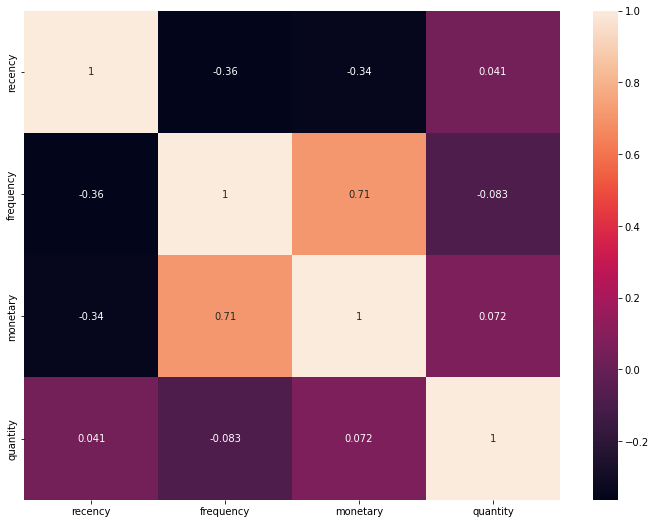

In [51]:
plt.figure(figsize=(12,9))
sns.heatmap(rfmq_table.corr(), annot=True)

<AxesSubplot:>

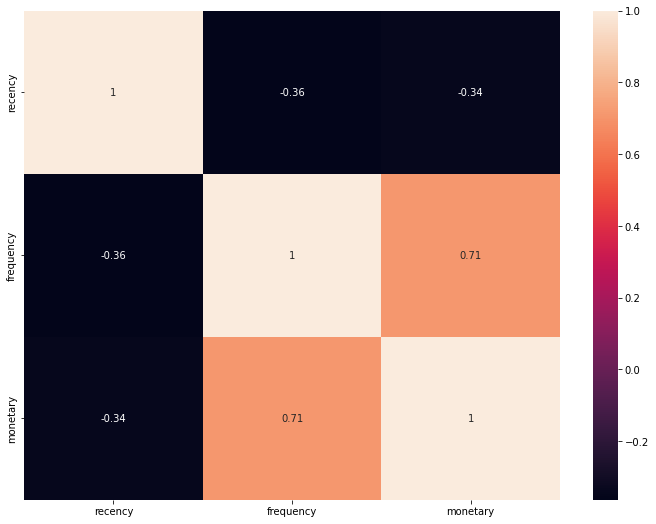

In [32]:
plt.figure(figsize=(12,9))
sns.heatmap(rfm_table.corr(), annot=True)

В обоих случаях признаки `frequency` и `monetary` сильно коррелируют, поэтому снизим размерность на 1.

In [52]:
pipe=Pipeline([('stand_scaler', StandardScaler()), ('pca', PCA(n_components=3))])
X_prep_rfmq=pipe.fit_transform(rfmq_table)
X_prep_rfmq

array([[-2.20622376, -0.05749751,  1.39141215],
       [ 3.7422292 ,  0.28530089,  0.85431619],
       [ 0.04576576,  0.62233437, -0.29362713],
       ...,
       [-1.44102036, -0.12556537,  0.17802383],
       [-0.54880722, -0.27745566, -1.27199493],
       [ 0.89818311,  0.09433759, -0.16297748]])

In [55]:
pipe=Pipeline([('stand_scaler', StandardScaler()), ('pca', PCA(n_components=2))])
X_prep_rfm=pipe.fit_transform(rfm_table)
X_prep_rfm

array([[-2.21070977,  1.37418572],
       [ 3.74431165,  0.89069404],
       [ 0.0620987 , -0.2041445 ],
       ...,
       [-1.44438147,  0.16156621],
       [-0.55281938, -1.29619025],
       [ 0.89978319, -0.14487106]])

In [58]:
type(X_prep)

numpy.ndarray

max silhouette score KMeans: 0.5241024044251199
max silhouette score Agglomerative: 0.465111223594607
max calisnki carabasz score KMeans: 6466.40150999531
max calisnki carabasz score Agglomerative: 5580.210134245311
min davies bouldin score KMeans: 0.633584218757664
min davies bouldin score Agglomerative: 0.6884963161095635


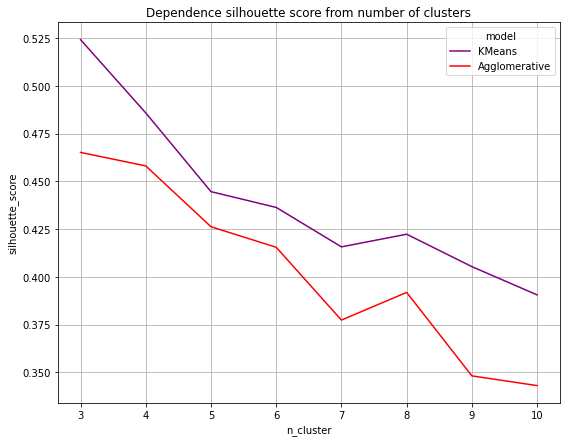

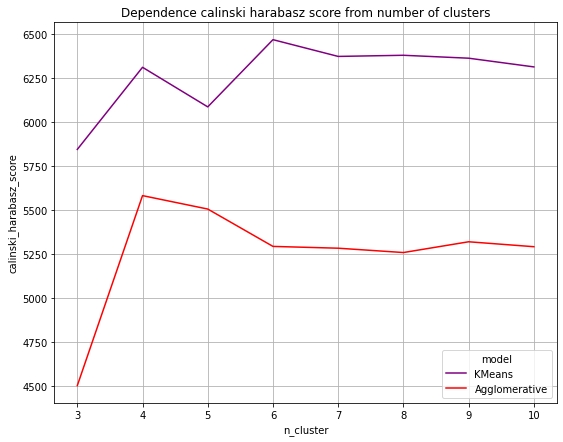

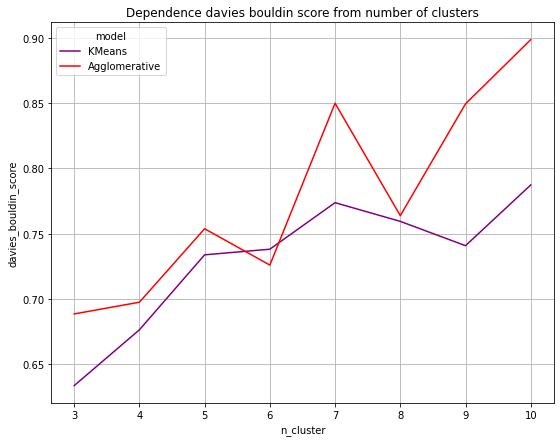

In [56]:
def check_model(X_prep: np.ndarray):
    """Функция для сравнения KMeans и Agglomerative
       и визуализация метрик для подборки количества кластеров

    Args:
        X_prep (np.ndarray): матрица для обучения моделей
    """
    # Подготовим данные: вычислим метрики для KMeans и Agglomerative
    # в зависимости от количества кластеров
    n_cluster=range(3,11)
    silhouette_scores_km=[]
    calinski_scores_km=[]
    davies_scores_km=[]
    calinski_scores_aggl=[]
    davies_scores_aggl=[]
    silhouette_scores_aggl=[]

    # Будем вычислять силуэты, индексы Дэвиса-Булдина и Калински-Харабаса
    for n in n_cluster:
        km=KMeans(n_clusters=n)
        aggl=AgglomerativeClustering(n_clusters=n)
        km.fit(X_prep)
        aggl.fit(X_prep)
        silhouette_scores_km.append(silhouette_score(X_prep, km.labels_))
        calinski_scores_km.append(calinski_harabasz_score(X_prep, km.labels_))
        davies_scores_km.append(davies_bouldin_score(X_prep, km.labels_))
        silhouette_scores_aggl.append(silhouette_score(X_prep, aggl.labels_))
        calinski_scores_aggl.append(calinski_harabasz_score(X_prep, aggl.labels_))
        davies_scores_aggl.append(davies_bouldin_score(X_prep, aggl.labels_))
        
    # Готовим таблицы для графиков
    models_df=['KMeans' for i in range(3,11)]+['Agglomerative' for i in range(3, 11)]
    data_line_silhouette=pd.DataFrame({'n_cluster':[i for i in range(3,11)]*2, 
                            'silhouette_score':silhouette_scores_km+silhouette_scores_aggl,
                            'model': models_df})

    data_line_calinski=pd.DataFrame({'n_cluster':[i for i in range(3,11)]*2, 
                            'calinski_harabasz_score':calinski_scores_km+calinski_scores_aggl,
                            'model': models_df})

    data_line_davies=pd.DataFrame({'n_cluster':[i for i in range(3,11)]*2, 
                            'davies_bouldin_score':davies_scores_km+davies_scores_aggl,
                            'model': models_df})

    # Постройка графиков
    plt.figure(figsize=(9, 7))
    sns.lineplot(data=data_line_silhouette, x='n_cluster', y='silhouette_score',
                hue='model', palette=['purple', 'red']).set(title='Dependence silhouette score from number of clusters')
    plt.grid(True);
    plt.figure(figsize=(9, 7))
    sns.lineplot(data=data_line_calinski, x='n_cluster', y='calinski_harabasz_score',
                hue='model', palette=['purple', 'red']).set(title='Dependence calinski harabasz score from number of clusters')
    plt.grid(True);
    plt.figure(figsize=(9, 7))
    sns.lineplot(data=data_line_davies, x='n_cluster', y='davies_bouldin_score',
                hue='model', palette=['purple', 'red']).set(title='Dependence davies bouldin score from number of clusters')
    plt.grid(True);

    print(f'max silhouette score KMeans: {max(silhouette_scores_km)}')
    print(f'max silhouette score Agglomerative: {max(silhouette_scores_aggl)}')
    print(f'max calisnki carabasz score KMeans: {max(calinski_scores_km)}')
    print(f'max calisnki carabasz score Agglomerative: {max(calinski_scores_aggl)}')
    print(f'min davies bouldin score KMeans: {min(davies_scores_km)}')
    print(f'min davies bouldin score Agglomerative: {min(davies_scores_aggl)}')
    

check_model(X_prep_rfm)

In [54]:
km=KMeans(n_clusters=3)
km.fit(X_prep_rfmq)
silhouette_score(X_prep_rfmq, km.labels_)

0.48602764545659766

max silhouette score KMeans: 0.5055348941343076
max silhouette score Agglomerative: 0.465149188677065
max calisnki carabasz score KMeans: 4643.542244029649
max calisnki carabasz score Agglomerative: 3834.9504157383562
min davies bouldin score KMeans: 0.5692930022018295
min davies bouldin score Agglomerative: 0.5656877015347292


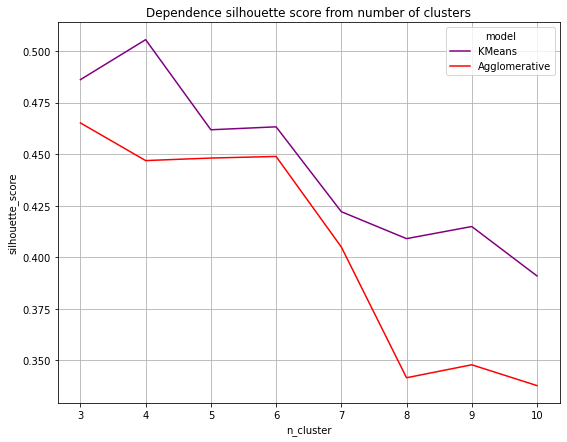

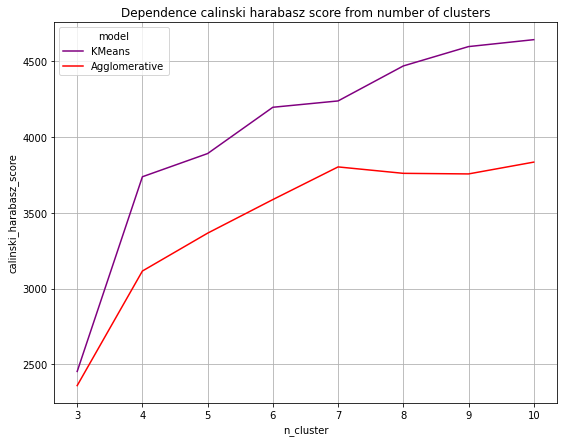

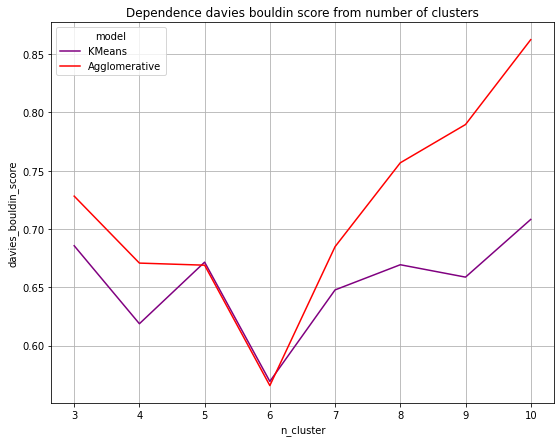

In [57]:
check_model(X_prep_rfmq)

По всем метрикам `KMeans` показала результаты лучше `Agglomerative`. Будем ориентироваться на коэффициент силуэта, поэтому возьмём количество кластеров, равное 3.

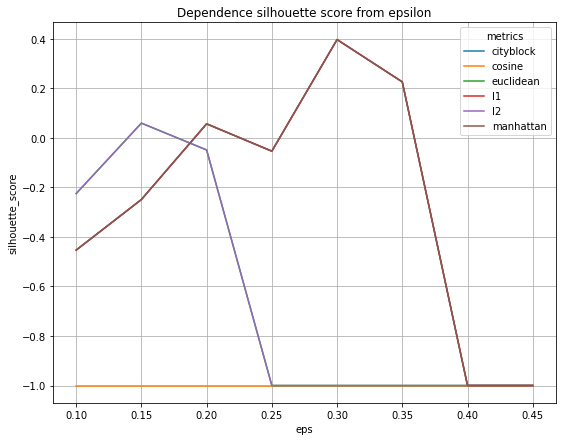

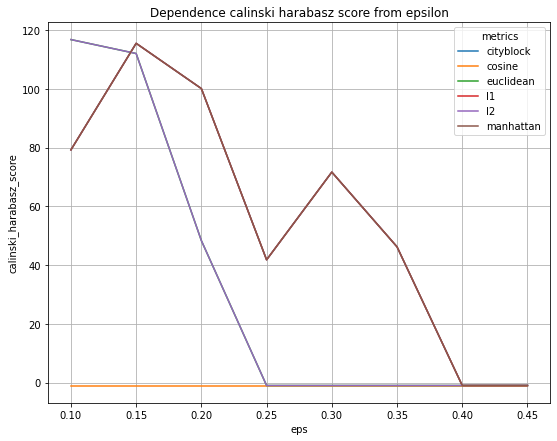

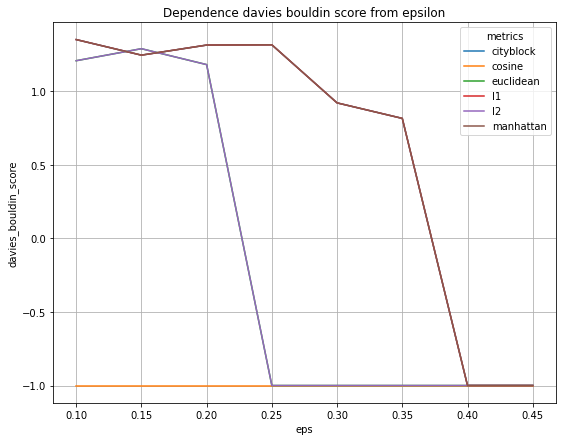

In [49]:
# Подготовим данные: вычислим метрики для KMeans и Agglomerative
# в зависимости от epsilon и метрики расстояния
metrics=[]
silhouette_scores=[]
calinski_harabasz_scores=[]
davies_bouldin_scores=[]
epses=[]
# Будем вычислять силуэты, индексы Дэвиса-Булдина и Калински-Харабаса
for metric in ['cityblock', 'cosine', 'euclidean', 'l1', 'l2', 'manhattan']:
    for eps in np.arange(0.1, 0.5, 0.05):
        db=DBSCAN(eps=eps, metric=metric)
        db.fit(X_prep)
        epses.append(eps)
        metrics.append(metric)
        # нужное нам количество кластеров варьируется от 3 до 11
        # поэтому будем смотреть только на эти случаи 
        if 3 <= len(pd.Series(db.labels_).unique()) <= 10:
            silhouette_scores.append(silhouette_score(X_prep, db.labels_))
            calinski_harabasz_scores.append(calinski_harabasz_score(X_prep, db.labels_))
            davies_bouldin_scores.append(davies_bouldin_score(X_prep, db.labels_))
        else:
            silhouette_scores.append(-1)
            calinski_harabasz_scores.append(-1)
            davies_bouldin_scores.append(-1)

# Готовим таблицы для графиков
data_line_silhouette=pd.DataFrame({'eps': epses, 'metrics': metrics, 'silhouette_score': silhouette_scores})
data_line_calinski=pd.DataFrame({'eps': epses, 'metrics': metrics, 'calinski_harabasz_score': calinski_harabasz_scores})
data_line_davies=pd.DataFrame({'eps': epses, 'metrics': metrics, 'davies_bouldin_score': davies_bouldin_scores})

# Постройка графиков
plt.figure(figsize=(9, 7))
sns.lineplot(data=data_line_silhouette, x='eps', y='silhouette_score',
             hue='metrics').set(title='Dependence silhouette score from epsilon')
plt.grid(True);
plt.figure(figsize=(9, 7))
sns.lineplot(data=data_line_calinski, x='eps', y='calinski_harabasz_score',
             hue='metrics').set(title='Dependence calinski harabasz score from epsilon')
plt.grid(True);
plt.figure(figsize=(9, 7))
sns.lineplot(data=data_line_davies, x='eps', y='davies_bouldin_score',
             hue='metrics').set(title='Dependence davies bouldin score from epsilon')
plt.grid(True);


`DBSCAN` показал самые худшие результаты.

### 3.2. Интерпретация результатов кластеризации

Перейдём к интерпретации полученных кластеров.

In [50]:
km=KMeans(n_clusters=3)
clusters=km.fit_predict(X_prep)
rfm_table['cluster']=clusters

#### 3.2.1. Визуализация кластеров

Визуализируйте результаты в виде 3D-диаграммы с осями Recency, Frequency и Monetary. Проанализируйте полученную диаграмму и попробуйте понять, какие кластеры у вас получились.

In [52]:
fig=px.scatter_3d(data_frame=rfm_table, x='recency', y='frequency'
                  , z='monetary', color='cluster', title='Clustering of clients')
fig.show()

К кластеру под номером `0` отнеслись клиенты, которые заказывали давно, не часто и на небольшую сумму( Скорее всего, эти клиенты перестанут пользоваться услугами магазина и на них нужно обратить особое внимание, чтобы снова завлечь их). К кластеру под номером `2` отнеслись клиенты, которые заказывали недавно, не часто и на небольшую сумму( Эти клиенты находятся в зоне риска, поэтому за их активностью стоит следить, чтобы они не в итоге не оказались в кластере `0`). В кластере под номером `1` оказались лояльные клиенты. Они заказывали недавно, часто и на большую сумму.

#### 3.2.2. Построение профиля кластеров

Далее составьте так называемый профиль кластеров. Для этого вам необходимо вернуться от декомпозированных данных (если вы производили понижение размерности) к RFM-таблице (очищенной от выбросов).

Сгруппируйте RFM-таблицу по полученным кластерам и рассчитайте среднее по каждому из признаков.

Чтобы результаты было проще интерпретировать, давайте познакомимся с одним из способов визуализации профиля кластеров — **Radar Chart** (полярная диаграмма, или диаграмма паутины). Это графическое представление значений нескольких эквивалентных категорий в форме паутины.

Radar Chart часто используется при определении профиля кластеров. На концах паутины откладываются оси, соответствующие признакам, описывающим объекты. На каждой из осей для каждого кластера откладываются средние значения соответствующих характеристик. Соединив точки по осям, мы получаем многоугольник. 

Пример полярной диаграммы для задачи кластеризации учеников по интересам:

<img src=https://www.datanovia.com/en/wp-content/uploads/2020/12/radar-chart-in-r-customized-fmstb-radar-chart-1.png width=500>

На этой диаграмме мы видим визуализацию признаков для одного из кластеров. Видно, что ученики, принадлежащие этому кластеру, в большей степени увлекаются музыкой (Music), а в меньшей — программированием (Programm).

В модуле `graph_objects` библиотеки `plotly` есть встроенная функция `Scatterpolar`, которая позволяет построить полярную диаграмму. На основе этой функции мы подготовили для вас функцию `plot_cluster_profile()`, которая позволяет визуализировать профиль каждого из кластеров в виде полярной диаграммы. У неё есть два параметра: `grouped_data` — сгруппированные по кластерам характеристики объектов (клиентов), `n_clusters` — количество кластеров.

Главное условие использования полярной диаграммы — все признаки должны быть приведены к единому масштабу с помощью нормализации, где 1 будет означать максимум, а 0 — минимум. Шаг с нормализацией мы также добавили в функцию `plot_cluster_profile()`.


In [53]:
from sklearn.preprocessing import MinMaxScaler


def plot_cluster_profile(grouped_data, n_clusters):
    """Функция для визуализации профиля кластеров в виде полярной диаграммы.

    Args:
        grouped_data (DataFrame): таблица, сгруппированная по номерам кластеров с агрегированными характеристиками объектов.
        n_clusters (int): количество кластеров
    """
    # Нормализуем сгруппированные данные, приводя их к масштабу 0-1.
    scaler = MinMaxScaler()
    grouped_data = pd.DataFrame(scaler.fit_transform(grouped_data), columns=grouped_data.columns)
    # Создаём список признаков
    features = grouped_data.columns
    # Создаём пустую фигуру
    fig = go.Figure()
    # В цикле визуализируем полярную диаграмму для каждого кластера
    for i in range(n_clusters):
        # Создаём полярную диаграмму и добавляем её на общий график
        fig.add_trace(go.Scatterpolar(
            r=grouped_data.iloc[i].values, # радиусы
            theta=features, # название засечек
            fill='toself', # заливка многоугольника цветом
            name=f'Cluster {i}', # название — номер кластера
        ))
    # Обновляем параметры фигуры
    fig.update_layout(
        showlegend=True, # отображение легенды
        autosize=False, # устаналиваем свои размеры графика
        width=800, # ширина (в пикселях)
        height=800, # высота (в пикселях)
    )
    # Отображаем фигуру
    fig.show()

Теперь у вас есть удобный инструмент для анализа профиля кластеров. Воспользуйтесь им, чтобы проинтерпретировать результаты, полученные на предыдущем шаге.

In [62]:
grouped_data=rfm_table.groupby('cluster').mean()
plot_cluster_profile(grouped_data, 3)